# Le diabète en Naive Bayes 

Nous allons aujourd'hui étudier le diabète dans les population d'indiens d'amérique. Regardons comment Naive Bayes peut nous aider dans la prédiction de diabiète 

0. Importez les librairies usuelles 

In [1]:
!pip install fancyimpute

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Importez le dataset dans un DataFrame 

In [0]:
dataset = pd.read_csv("diabetes.csv")

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.Outcome.unique()

array([1, 0])

2. Faites une description du dataset

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. Il semblerait que nous ayons des valeurs aberrantes. Enlevez toutes les valeurs pour lesquelles l'insuline est à plus de 3 écart-types de la moyenne 

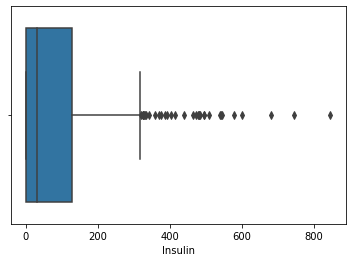

In [7]:
sns.boxplot(x=dataset.Insulin) 

In [8]:
"""SUPPRESSION DES OBSERVATIONS CONTENANT DES VALEURS MANQUANTES"""

dataset = dataset[(dataset.Insulin < dataset.Insulin.mean() + 3*dataset.Insulin.std()) & (dataset.Insulin > dataset.Insulin.mean()- 3*dataset.Insulin.std())]
dataset = dataset[dataset.Insulin>0]
dataset = dataset[dataset.Glucose>0]
dataset = dataset[dataset.BMI>0]
dataset.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,3.310160,120.548128,70.529412,28.831551,137.152406,32.899733,0.516422,30.687166,0.315508
std,3.229398,29.758935,12.534903,10.502698,80.448580,7.026932,0.326144,9.988250,0.465340
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.250000,76.000000,27.925000,0.273000,23.000000,0.000000
50%,2.000000,117.000000,70.000000,29.000000,120.000000,33.100000,0.446500,27.000000,0.000000
75%,5.000000,139.000000,78.000000,36.000000,180.000000,36.875000,0.681000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,415.000000,67.100000,2.420000,81.000000,1.000000


4. Faites un boxplot pour voir la répartition de l'Insuline dans le dataset 

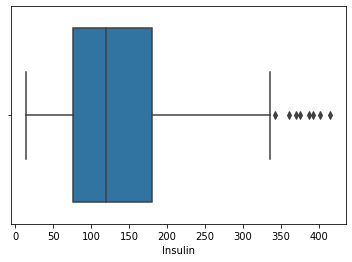

In [9]:
sns.boxplot(x=dataset.Insulin) 

5. Regardez la distribution de chacune de vos colonnes 

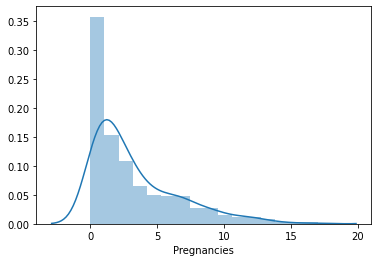

In [13]:
sns.distplot(dataset.iloc[:,0])

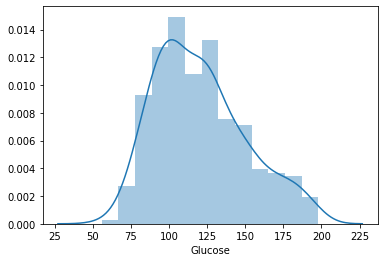

In [14]:
sns.distplot(dataset.iloc[:,1])

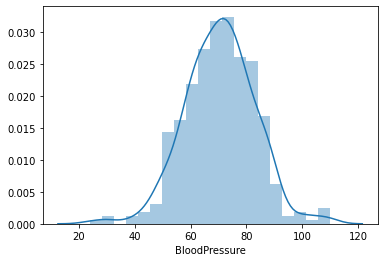

In [15]:
sns.distplot(dataset.iloc[:,2])

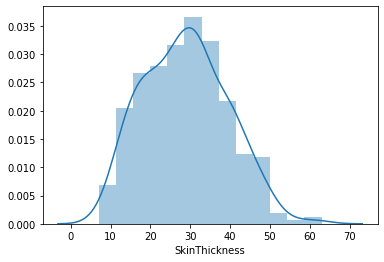

In [16]:
sns.distplot(dataset.iloc[:,3])

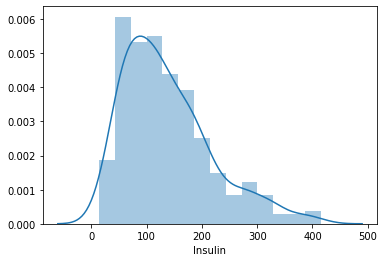

In [17]:
sns.distplot(dataset.iloc[:,4])

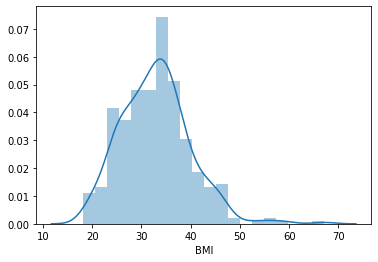

In [18]:
sns.distplot(dataset.iloc[:,5])

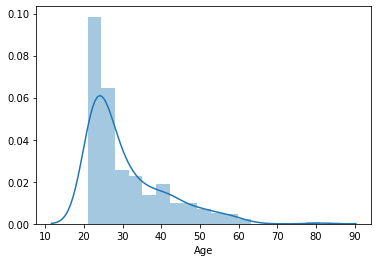

In [19]:
sns.distplot(dataset.iloc[:,7])

6. On voit que nous avons encore des valeurs qui semblent aberrantes. Reproduisons la même techniques que nous avons utilisée plus haut pour retirer les valeurs aberrantes 

In [10]:
dataset.mean()

Pregnancies                   3.310160
Glucose                     120.548128
BloodPressure                70.529412
SkinThickness                28.831551
Insulin                     137.152406
BMI                          32.899733
DiabetesPedigreeFunction      0.516422
Age                          30.687166
Outcome                       0.315508
dtype: float64

In [0]:
dataset = dataset[(dataset < dataset.mean() + 3*dataset.std()) & (dataset > dataset.mean()- 3*dataset.std())]

In [12]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137,40.0,35.0,168.0,43.1,NaN,33.0,1
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1
14,5.0,166,72.0,19.0,175.0,25.8,0.587,51.0,1
16,0.0,118,84.0,47.0,230.0,45.8,0.551,31.0,1


In [23]:
dataset.Outcome.unique()

array([0, 1])

7. Remplacez les valeurs NaN par une interpolation

In [13]:
from fancyimpute import KNN
dataset = pd.DataFrame(KNN(k=3).fit_transform(dataset), columns = dataset.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


Imputing row 1/374 with 0 missing, elapsed time: 0.027
Imputing row 101/374 with 0 missing, elapsed time: 0.028
Imputing row 201/374 with 0 missing, elapsed time: 0.029
Imputing row 301/374 with 0 missing, elapsed time: 0.030


In [25]:
dataset.Outcome.unique()

array([0., 1.])

 8. Séparez votre dataset en un train et un test set 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:,-1], random_state = 42, test_size = 0.3, stratify  = dataset.iloc[:,-1])

9. Passons maintenant par une phase de normalisation. Normalisez toutes vos variables explicatives puis stockez les dans une variable X.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X_train.columns)

In [28]:
y_train.unique()

array([1., 0.])

10. Regardez maintenant la distribution de chacune des variables 

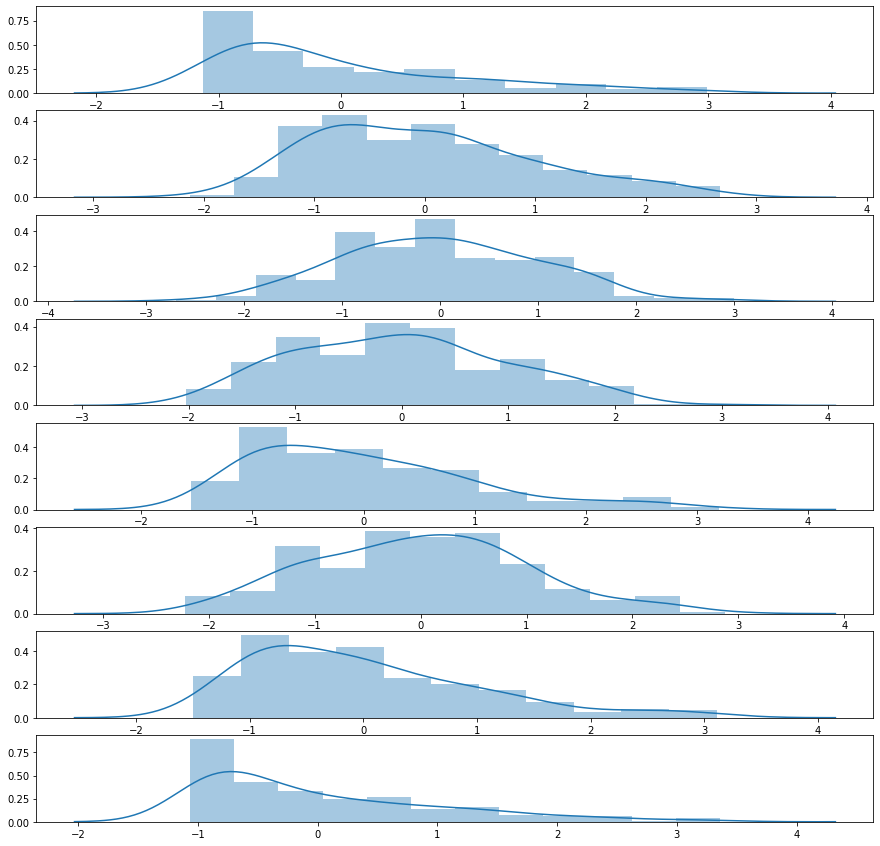

In [16]:
f, ax = plt.subplots(8,1,figsize = (15,15))
for i,a in zip(X_train.columns,ax):
  sns.distplot(pd.DataFrame(X_train[i]), ax = a)

11. Importez Gaussian Naive Bayes & entrainez le sur votre données d'entraînement 

In [0]:
import sklearn.naive_bayes as nb
naivebayes = nb.GaussianNB()
naivebayes_fit = naivebayes.fit(X_train, y_train)

In [31]:
y_train.unique()

array([1., 0.])

12. Regardez votre performance 

In [18]:
naivebayes_fit.score(X_test,y_test)

0.7345132743362832

In [19]:
naivebayes_fit.score(X_train,y_train)

0.7816091954022989

In [34]:
y_train.unique()

array([1., 0.])

13. Voyons si nous pouvons améliorer notre modèle. Faites un pointplot sur chacune des varaibles par rapport à l'outcome. Pourrait-on créer de nouvelles variables ? 

In [35]:
dataset.iloc[:,-1].unique()

array([0., 1.])

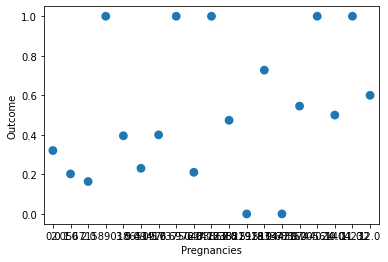

In [36]:
sns.pointplot(x=dataset.iloc[:,0],y=dataset.iloc[:,-1], join=False, ci=None)

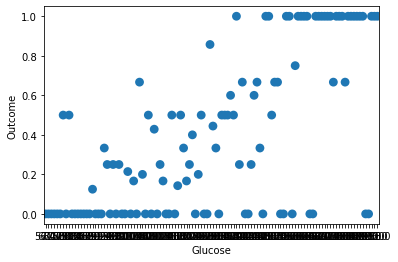

In [37]:
sns.pointplot(x=dataset.iloc[:,1],y=dataset.iloc[:,-1], join=False, ci=None)

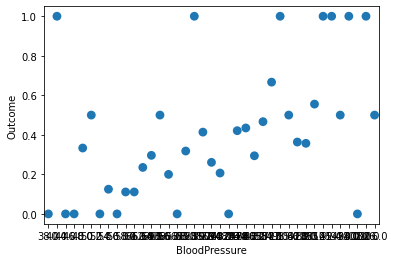

In [38]:
sns.pointplot(x=dataset.iloc[:,2],y=dataset.iloc[:,-1], join=False, ci=None)

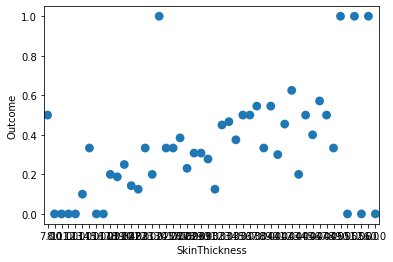

In [39]:
sns.pointplot(x=dataset.iloc[:,3],y=dataset.iloc[:,-1], join=False, ci=None)

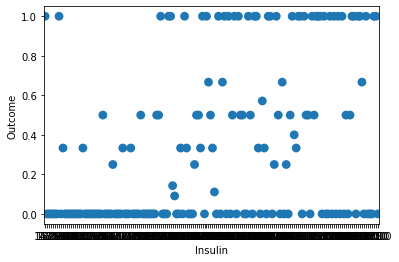

In [40]:
sns.pointplot(x=dataset.iloc[:,4],y=dataset.iloc[:,-1], join=False, ci=None)

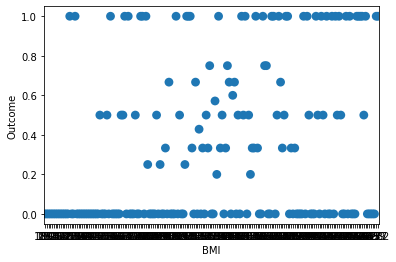

In [41]:
sns.pointplot(x=dataset.iloc[:,5],y=dataset.iloc[:,-1], join=False, ci=None)

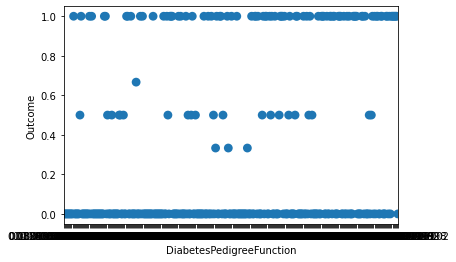

In [42]:
sns.pointplot(x=dataset.iloc[:,6],y=dataset.iloc[:,-1], join=False, ci=None)

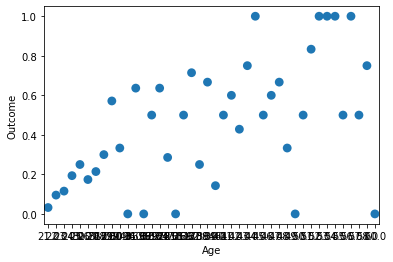

In [43]:
sns.pointplot(x=dataset.iloc[:,7],y=dataset.iloc[:,-1], join=False, ci=None)

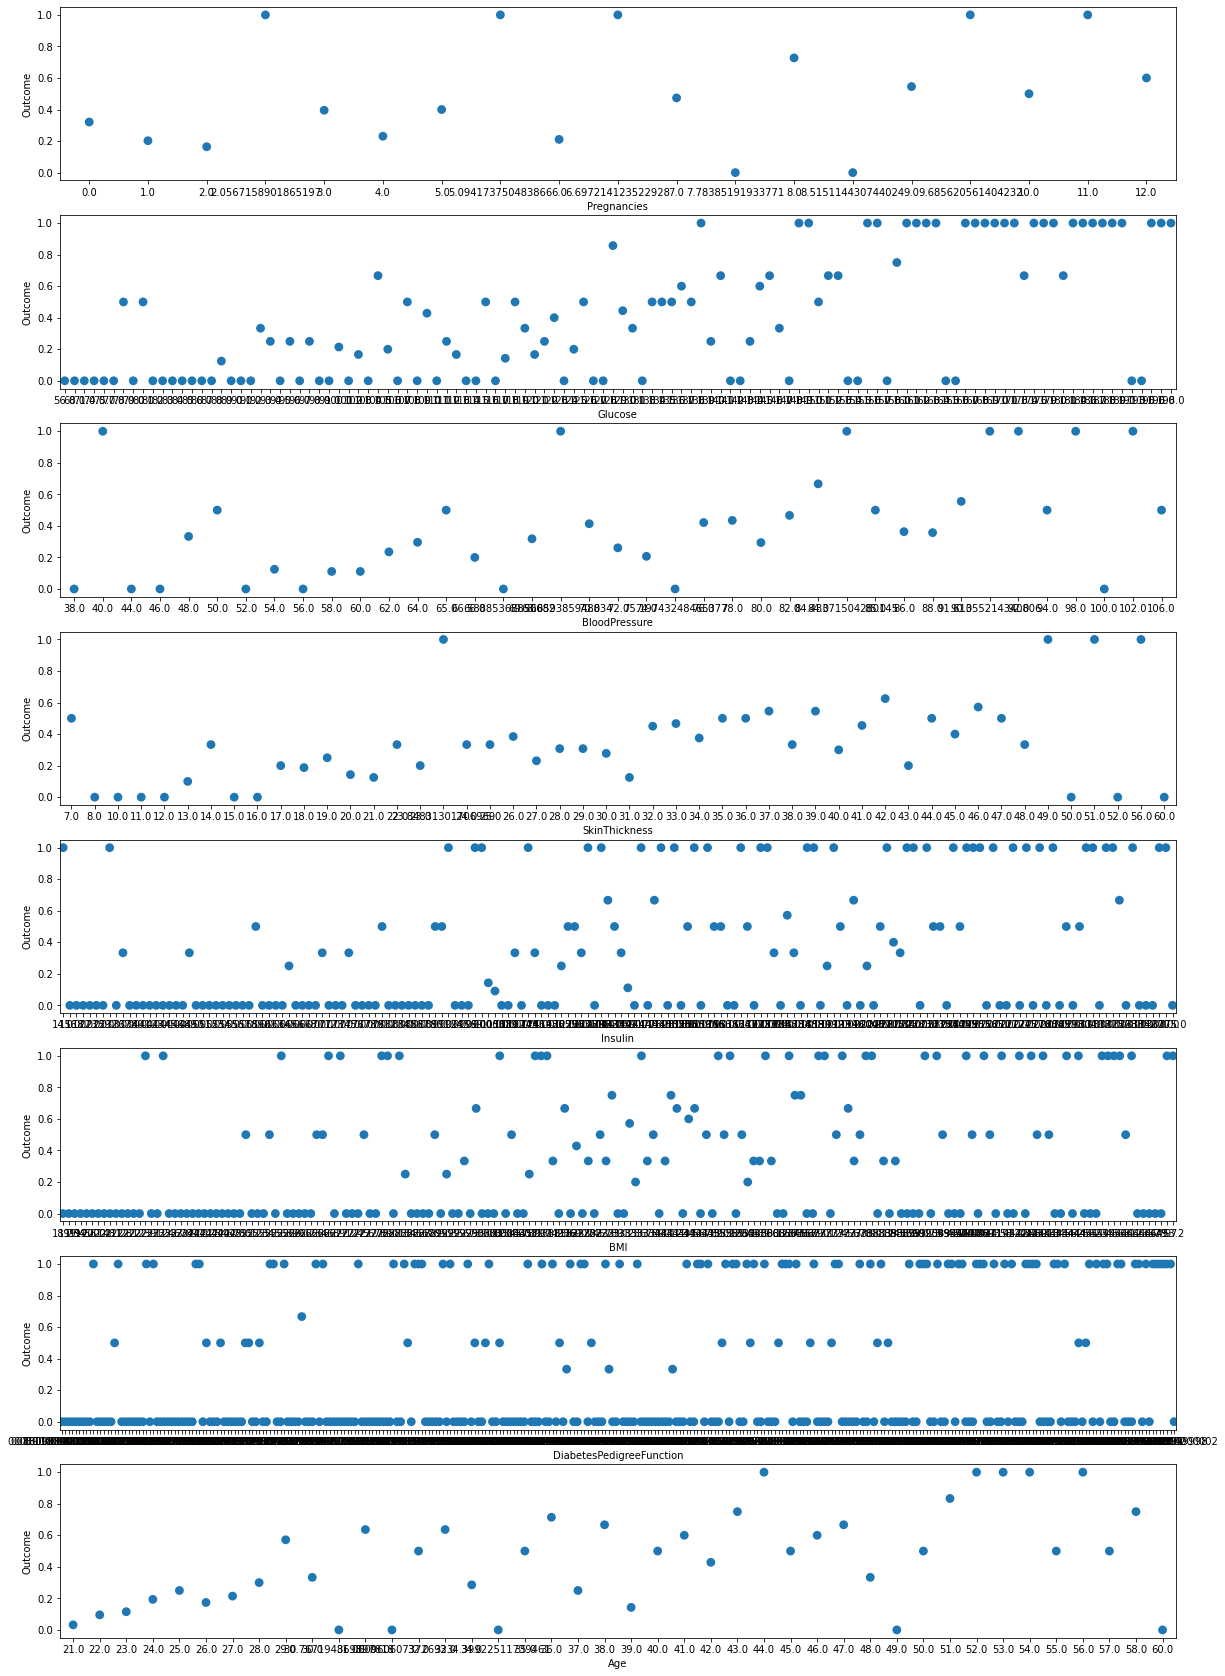

In [44]:
#for i in range(7):
#  sns.pointplot(x=dataset.iloc[:,i],y=dataset.iloc[:,-1], join=False, ci=None)
#  plt.show()

#for column in dataset.iloc[:,:-1].columns:
#  sns.pointplot(x=column, y="Outcome", data=dataset, join=False, ci=None)
#  plt.show()

f, ax = plt.subplots(8,1,figsize = (20,30))
for i,a in zip(X_train.columns,ax):
  sns.pointplot(x=i, y="Outcome", data=dataset, ax = a, join=False, ci=None)

14. Faisons un modèle de Bagging avec Naive Bayes. En utilisant le module ```BaggingClassifier```, Tentez de créer un nouveau modèle

In [20]:
from sklearn.ensemble import BaggingClassifier as BC
naivebayes = nb.GaussianNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 1000) 
modelB_fit = modelB.fit(X_train,y_train)

print(modelB_fit.score(X_train,y_train))
modelB_fit.score(X_test,y_test)

0.7777777777777778


0.7345132743362832

In [0]:
BC?

*15*. Tentez de refaire votre modèle cette fois avec Bernouilli Naive Bayes 

In [22]:
from sklearn.preprocessing import KBinsDiscretizer


X_train_discrete = pd.DataFrame(kb.fit_transform(X_train), columns=X_train.columns, dtype=str)
X_test_discrete = pd.DataFrame(kb.transform(X_test), columns=X_train.columns, dtype=str)

X_train_discrete.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,5.0,9.0,3.0,6.0,6.0,4.0,8.0
1,1.0,7.0,3.0,0.0,6.0,0.0,4.0,0.0
2,0.0,2.0,8.0,1.0,3.0,1.0,2.0,1.0
3,1.0,5.0,3.0,6.0,6.0,6.0,7.0,6.0
4,1.0,4.0,0.0,2.0,5.0,0.0,4.0,4.0


In [23]:
X_train_discrete = pd.get_dummies(X_train_discrete)
X_test_discrete = pd.get_dummies(X_test_discrete)

display(X_train_discrete)

,Pregnancies_0.0,Pregnancies_1.0,Pregnancies_2.0,Pregnancies_3.0,Pregnancies_4.0,Pregnancies_5.0,Pregnancies_6.0,Glucose_0.0,Glucose_1.0,Glucose_2.0,Glucose_3.0,Glucose_4.0,Glucose_5.0,Glucose_6.0,Glucose_7.0,Glucose_8.0,Glucose_9.0,BloodPressure_0.0,BloodPressure_1.0,BloodPressure_2.0,BloodPressure_3.0,BloodPressure_4.0,BloodPressure_5.0,BloodPressure_6.0,BloodPressure_7.0,BloodPressure_8.0,BloodPressure_9.0,SkinThickness_0.0,SkinThickness_1.0,SkinThickness_2.0,SkinThickness_3.0,SkinThickness_4.0,SkinThickness_5.0,SkinThickness_6.0,SkinThickness_7.0,SkinThickness_8.0,SkinThickness_9.0,Insulin_0.0,Insulin_1.0,Insulin_2.0,Insulin_3.0,Insulin_4.0,Insulin_5.0,Insulin_6.0,Insulin_7.0,Insulin_8.0,Insulin_9.0,BMI_0.0,BMI_1.0,BMI_2.0,BMI_3.0,BMI_4.0,BMI_5.0,BMI_6.0,BMI_7.0,BMI_8.0,BMI_9.0,DiabetesPedigreeFunction_0.0,DiabetesPedigreeFunction_1.0,DiabetesPedigreeFunction_2.0,DiabetesPedigreeFunction_3.0,DiabetesPedigreeFunction_4.0,DiabetesPedigreeFunction_5.0,DiabetesPedigreeFunction_6.0,DiabetesPedigreeFunction_7.0,DiabetesPedigreeFunction_8.0,DiabetesPedigreeFunction_9.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
257,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
258,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
259,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [24]:
from sklearn.naive_bayes import BernoulliNB

naivebayes = nb.BernoulliNB()

naivebayes_fit = naivebayes.fit(X_train_discrete,y_train)
print(naivebayes_fit.score(X_test_discrete, y_test))

0.7433628318584071


In [0]:
KBinsDiscretizer?

# Nouvelle section

16. Refaites un modèle de Bagging pour voir si vous pouvez encore améliorer votre score 

In [25]:
naivebayes = nb.BernoulliNB()
modelB = BC(base_estimator = naivebayes, n_estimators = 100, max_samples = 0.9)
modelB_fit = modelB.fit(X_train_discrete,y_train)

print(modelB_fit.score(X_train_discrete,y_train))
modelB_fit.score(X_test_discrete,y_test)

0.842911877394636


0.7699115044247787

In [104]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(modelB, X_train_discrete.append(X_test_discrete).reset_index(drop=True), y_train.append(y_test).reset_index(drop=True), cv=10).mean())
print("+-",2*cross_val_score(modelB, X_train_discrete.append(X_test_discrete).reset_index(drop=True), y_train.append(y_test).reset_index(drop=True), cv=10).std())

0.7728307254623044
+- 0.1569621840040305


In [0]:
"""ALTERNATIVEMENT POUR REMPLACER LES 0 ABSURDES PAR DES NAN"""


q1 = dataset.Insulin.quantile(0.25)
q3 = dataset.Insulin.quantile(0.75)
dataset = dataset[(dataset.Insulin < q3 + 1.5*(q3-q1)) & (dataset.Insulin > q1- 1.5*(q3-q1))]
cols = ["Glucose","BMI","Insulin","BloodPressure","SkinThickness"]
dataset[cols] = dataset[cols].replace({0:np.nan})

In [0]:
y = dataset["Outcome"]
X = dataset.drop("Outcome", axis = 1)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain_norm = pd.DataFrame(sc.fit_transform(Xtrain), columns=Xtrain.columns)
Xtest_norm = pd.DataFrame(sc.transform(Xtest), columns = Xtest.columns)

from fancyimpute import KNN
knn = KNN(k=3)
Xtrain_norm_clean = pd.DataFrame(knn.fit_transform(Xtrain_norm),
                                 columns = Xtrain.columns)
Xtest_norm_clean = pd.DataFrame(knn.fit_transform(Xtest_norm),
                                columns = Xtest.columns)
# on devrait normalement appliquer une méthode knn.transform sur Xtest mais
# elle n'est pas encore disponible dans la librairie 

Imputing row 1/277 with 0 missing, elapsed time: 0.031
Imputing row 101/277 with 0 missing, elapsed time: 0.031
Imputing row 201/277 with 0 missing, elapsed time: 0.032
Imputing row 1/93 with 0 missing, elapsed time: 0.006


/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/usr/local/lib/python3.6/dist-packages/fancyimpute/solver.py:58: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [56]:
from sklearn.naive_bayes import GaussianNB 
G_nb = GaussianNB()

G_nb.fit(Xtrain_norm_clean, ytrain)
G_nb.score(Xtest_norm_clean, ytest)

0.6881720430107527